# Colab Setup

## Check Colab Accelerator Mode
If below command fails in Google Colab, please go to Runtime > Change Runtime Type and Change Hardware Accelerator Type to "GPU"

In [0]:
!nvidia-smi

Mon Dec 30 16:58:27 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## Install Dependencies and import packages

Install tensorflow 2.0.0 and tensorflow-addons. You will need to restart Google Colab runtime as instructed.

Please note that tensorflow-addons supports only MacOS and Linux currently.

In [0]:
!pip install tensorflow-gpu==2.0.0 tensorflow-addons

Install supporting functions for use in the notebook and minimizes clutter

[Github link to supporting functions for the workshop](https://github.com/yoke2/suptools)

In [0]:
!pip install -U git+https://github.com/yoke2/suptools.git

In [0]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import gdown
import zipfile
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
print(tf.__version__)

2.0.0


In [0]:
from suptools.core import *
from suptools.imgtools import *
from suptools.tftools import *

# Data Collection

## Download Images

This is for demonstration purposes only. Please upload your own files.

In [0]:
#gdown.download('https://drive.google.com/uc?export=download&id=18QDpvCyO2BsX2ILMDWyFubvFzPBLkoAi', output='food_urls_3class.zip', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=18QDpvCyO2BsX2ILMDWyFubvFzPBLkoAi
To: /content/food_urls_3class.zip
100%|██████████| 36.9k/36.9k [00:00<00:00, 26.1MB/s]


'food_urls_3class.zip'

In [0]:
# with zipfile.ZipFile('food_urls_3class.zip', 'r') as zipObj:
#     zipObj.extractall()

Upload your list of files here. Once done, please proceed to download.

In [0]:
results_cr = download_images('chicken_rice.txt', 'data/chicken_rice')
list(filter(lambda x:'Failed' in x, results_cr))

["Failed: Can't download https://casaveneracion.com/wp-content/uploads/2016/01/hainanese-chicken-rice-1.jpg",
 "Failed: Can't download https://i0.wp.com/www.guaishushu1.com/wp-content/uploads/2016/12/IMG_4829.jpg?ssl=1",
 "Failed: Can't download https://www.singaporenbeyond.com/wp-content/uploads/2019/01/Hainanese-Chicken-Rice.jpg. Exception: HTTPSConnectionPool(host='www.singaporenbeyond.com', port=443): Max retries exceeded with url: /wp-content/uploads/2019/01/Hainanese-Chicken-Rice.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:852)'),))"]

In [0]:
results_mg = download_images('mee_goreng.txt', './data/mee_goreng')
list(filter(lambda x:'Failed' in x, results_mg))

["Failed: Can't download https://casaveneracion.com/wp-content/uploads/2016/01/mir-goreng-1.jpg",
 "Failed: Can't download https://i1.wp.com/www.guaishushu1.com/wp-content/uploads/2016/04/IMG_3346.jpg?ssl=1",
 "Failed: Can't download x-raw-image:///b2f64b6cb4c7a85cbc3dfd0e93977710cacdb40273a1f1276ac88b5536e732ae. Exception: No connection adapters were found for 'x-raw-image:///b2f64b6cb4c7a85cbc3dfd0e93977710cacdb40273a1f1276ac88b5536e732ae'",
 "Failed: Can't download x-raw-image:///ad8756217c1af3ab15560e9f16ed250213589022eae2dec97b2f875f6ce1a8ef. Exception: No connection adapters were found for 'x-raw-image:///ad8756217c1af3ab15560e9f16ed250213589022eae2dec97b2f875f6ce1a8ef'",
 "Failed: Can't download https://i0.wp.com/www.guaishushu1.com/wp-content/uploads/2016/04/IMG_3361.jpg?ssl=1"]

In [0]:
results_rp = download_images('roti_prata.txt', './data/roti_prata')
list(filter(lambda x:'Failed' in x, results_rp))

["Failed: Can't download http://www.makansutra.com/images/story/detail/03c84a_sdefregtrhy5.jpg. Exception: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))",
 "Failed: Can't download https://admin.havehalalwilltravel.com/wp-content/uploads/2017/06/14-julaiha_900.jpg. Exception: HTTPSConnectionPool(host='admin.havehalalwilltravel.com', port=443): Max retries exceeded with url: /wp-content/uploads/2017/06/14-julaiha_900.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:852)'),))",
 "Failed: Can't download https://i2.wp.com/i1296.photobucket.com/albums/ag5/thefifthparlour/6F36498C-A006-4791-84E6-A852D27081C6_zpstiouvd89.jpg",
 "Failed: Can't download https://mothership.sg/canornot/img/uploads/images/000/000/500/original/prata.jpg"]

In [0]:
??download_images

In [0]:
??download_image

## Verify Images

In [0]:
verify_images(Path('./data'), recurse=True)

In [0]:
??verify_images

In [0]:
??verify_image_tf

## Optional: Save images to local
Due to large file size, you can download these verified images using croc efficiently.

[Link to Github for Croc](https://github.com/schollz/croc)

Windows Install:  
Download and unzip Windows binary from the [Github release page](https://github.com/schollz/croc/releases)

Alternative you can install using scoop
```
$ scoop bucket add schollz-bucket https://github.com/schollz/scoop-bucket.git
$ scoop install croc
```
Mac Install:
```
$ brew install schollz/tap/croc
```
Linux/Windows Subsystem for Linux Install:
```
$ curl https://getcroc.schollz.com | bash
```
Command to enter on desktop side:
```
croc -yes <provided-pass-code>
```

In [0]:
!zip -r food_data_verified.zip ./data

In [0]:
!curl https://getcroc.schollz.com | bash

In [0]:
!croc send food_data_verified.zip

## Optional: Saving to images to Google Cloud Storage or Google Drive
Alternatively, you can save the images to Google Cloud Storage or Google Drive.

**Save zipped images to Cloud Storage Bucket**  
Please refer to sample code snippets in Google Colab and modify accordingly. (Code snippets > Saving data with the Cloud Storage Python API)

**Save zipped images to Google Drive**  
Please refer to sample code snippets in Google Colab and modify accordingly. (Code snippets > Saving data to Google Drive)

## Optional: Download prepared data
In case that you are unable to follow through the previous steps, here is a zip file of images prepared prior.

In [0]:
# Delete any previous data
!rm -rf ./data

In [0]:
gdown.download('https://drive.google.com/uc?export=download&id=1ku2anpAgPkdOchsAeIz-rrFDgdY08BKy', output='food_data_verified.zip', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1ku2anpAgPkdOchsAeIz-rrFDgdY08BKy
To: /content/food_data_verified.zip
279MB [00:01, 150MB/s]


'food_data_verified.zip'

In [0]:
with zipfile.ZipFile('food_data_verified.zip', 'r') as zipObj:
    zipObj.extractall()

# Data processing using tf.data

In [0]:
datapath=Path('./data')

Note: We have to reuse CLASS_NAMES in the displayed order below later.

In [0]:
CLASS_NAMES = np.array([x.name for x in datapath.glob('*')])
CLASS_NAMES

array(['mee_goreng', 'roti_prata', 'chicken_rice'], dtype='<U12')

In [0]:
BATCH_SIZE = 32
IMG_SIZE = 224

## Create Train, Valid and Test sets

Note: This is done at filepath level

In [0]:
all_files = get_all_files(datapath, recurse=True)

In [0]:
train_filepaths, tmp_filepaths = train_test_split(all_files, valid_pct=0.3, seed=42)
valid_filepaths, test_filepaths = train_test_split(tmp_filepaths, valid_pct=0.5, seed=42)

In [0]:
len(train_filepaths),len(valid_filepaths),len(test_filepaths)

(709, 152, 153)

## Image Augmentations

You can experiment with other image augmentation functions provided in suptools.tftools

[List of image augmentation functions to experiment](https://yoke2.github.io/suptools/tftools/#Image-Augmentation)

In [0]:
train_aug = [random_crop, random_flip, random_rotate]
valid_aug = [central_crop]
aug = (train_aug, valid_aug)

## Process data and create tf.data.Dataset

In [0]:
train_ds = read_img_dataset([str(x) for x in train_filepaths], CLASS_NAMES=CLASS_NAMES, shuffle_size=1024, img_size=IMG_SIZE, batch_size=BATCH_SIZE, n_parallel=4, augments=aug, mode='train')
valid_ds = read_img_dataset([str(x) for x in valid_filepaths], CLASS_NAMES=CLASS_NAMES, img_size=IMG_SIZE, batch_size=BATCH_SIZE, n_parallel=4, augments=aug, mode='valid')
test_ds = read_img_dataset([str(x) for x in test_filepaths], CLASS_NAMES=CLASS_NAMES, img_size=IMG_SIZE, batch_size=BATCH_SIZE, n_parallel=4, augments=aug, mode='test')

In [0]:
??read_img_data_set

In [0]:
??process_img_path

## Observe a single batch across Train, Valid and Test sets

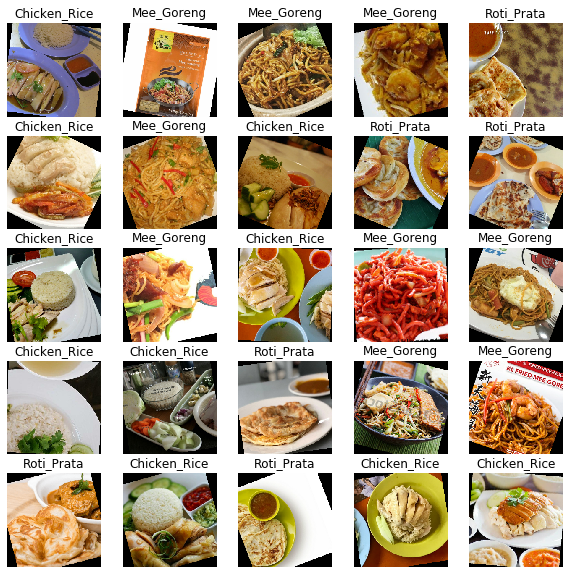

In [0]:
show_batch(train_ds,CLASS_NAMES)

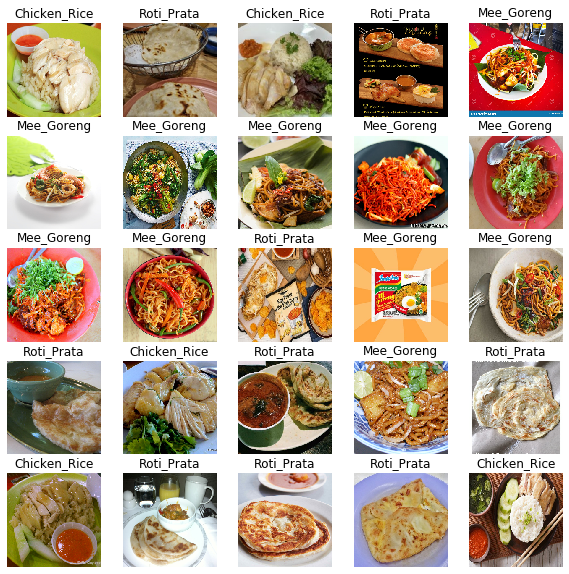

In [0]:
show_batch(valid_ds,CLASS_NAMES)

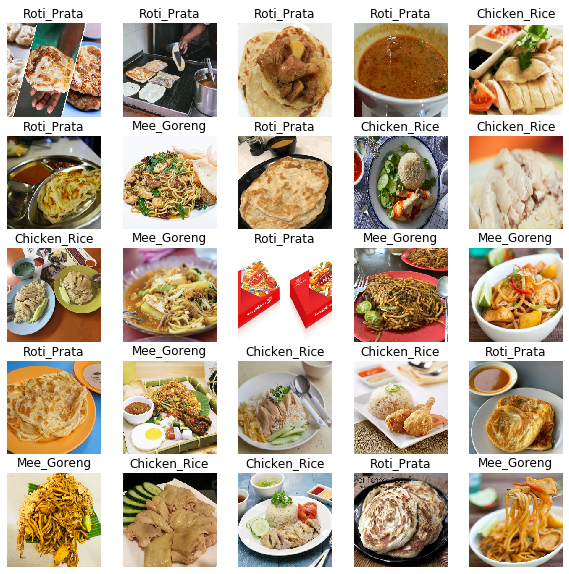

In [0]:
show_batch(test_ds,CLASS_NAMES)

# Model Training with Transfer Learning

## Initial Model

In [0]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [0]:
base_model = MobileNetV2(input_shape=(IMG_SIZE,IMG_SIZE,3),
                      include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dense(128, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

9412608/9406464 [==============================] - 2s 0us/step


See below the model summary. Please observe the total training parameters and trainable parameters values.

In [0]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Please observe the use of checkpoints and its configuration

In [0]:
modelname = 'model'
filepath  = modelname + ".h5"
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_accuracy', 
                             verbose=0, 
                             save_best_only=True, 
                             mode='max')
callbacks_list  = [checkpoint]

In [0]:
history = model.fit(train_ds,
                    epochs=10,
                    steps_per_epoch=len(train_filepaths)//BATCH_SIZE,
                    validation_data=valid_ds,
                    validation_steps=len(valid_filepaths)//BATCH_SIZE,
                    callbacks = callbacks_list)

Train for 22 steps, validate for 4 steps
Epoch 1/10
22/22 [==============================] - 53s 2s/step - loss: 0.7691 - accuracy: 0.6520 - val_loss: 0.4190 - val_accuracy: 0.8438
Epoch 2/10
22/22 [==============================] - 2s 106ms/step - loss: 0.3815 - accuracy: 0.8537 - val_loss: 0.2312 - val_accuracy: 0.9062
Epoch 3/10
22/22 [==============================] - 2s 86ms/step - loss: 0.2652 - accuracy: 0.8991 - val_loss: 0.2341 - val_accuracy: 0.8984
Epoch 4/10
22/22 [==============================] - 2s 104ms/step - loss: 0.2598 - accuracy: 0.9034 - val_loss: 0.1622 - val_accuracy: 0.9531
Epoch 5/10
22/22 [==============================] - 2s 86ms/step - loss: 0.2472 - accuracy: 0.9077 - val_loss: 0.1772 - val_accuracy: 0.9375
Epoch 6/10
22/22 [==============================] - 2s 87ms/step - loss: 0.1571 - accuracy: 0.9489 - val_loss: 0.1355 - val_accuracy: 0.9531
Epoch 7/10
22/22 [==============================] - 2s 87ms/step - loss: 0.1475 - accuracy: 0.9432 - val_loss: 0

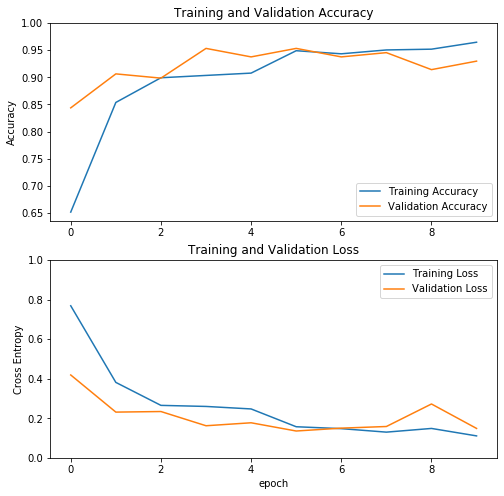

In [0]:
plot_history(history)

In [0]:
evalmod = load_model('model.h5')

In [0]:
evalmod.evaluate(valid_ds, steps=len(valid_filepaths)//BATCH_SIZE)

4/4 [==============================] - 1s 241ms/step - loss: 0.1622 - accuracy: 0.9531


[0.1621575765311718, 0.953125]

## Attempt Finetuning

Reload best model found earlier

In [0]:
model = load_model('model.h5')

In [0]:
model.trainable = True
# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in model.layers[:fine_tune_at]:
  layer.trainable =  False

Note: Default learning rate for adam is 0.001. Reference: [Tensorflow documentation on Adam Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam?version=stable)

Learning rate is reduced here.

In [0]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
modelname = 'model2'
filepath  = modelname + ".h5"
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_accuracy', 
                             verbose=0, 
                             save_best_only=True, 
                             mode='max')
callbacks_list  = [checkpoint]

In [0]:
history = model.fit(train_ds,
                    epochs=15,
                    steps_per_epoch=len(train_filepaths)//BATCH_SIZE,
                    validation_data=valid_ds,
                    validation_steps=len(valid_filepaths)//BATCH_SIZE,
                    callbacks = callbacks_list)

Train for 22 steps, validate for 4 steps
Epoch 1/15
22/22 [==============================] - 7s 328ms/step - loss: 0.1970 - accuracy: 0.9290 - val_loss: 0.0957 - val_accuracy: 0.9766
Epoch 2/15
22/22 [==============================] - 2s 107ms/step - loss: 0.0651 - accuracy: 0.9730 - val_loss: 0.1326 - val_accuracy: 0.9609
Epoch 3/15
22/22 [==============================] - 2s 107ms/step - loss: 0.0217 - accuracy: 0.9972 - val_loss: 0.1698 - val_accuracy: 0.9375
Epoch 4/15
22/22 [==============================] - 2s 107ms/step - loss: 0.0245 - accuracy: 0.9929 - val_loss: 0.1518 - val_accuracy: 0.9531
Epoch 5/15
22/22 [==============================] - 2s 107ms/step - loss: 0.0301 - accuracy: 0.9915 - val_loss: 0.2630 - val_accuracy: 0.9062
Epoch 6/15
22/22 [==============================] - 2s 108ms/step - loss: 0.0143 - accuracy: 0.9986 - val_loss: 0.3078 - val_accuracy: 0.8828
Epoch 7/15
22/22 [==============================] - 2s 107ms/step - loss: 0.0114 - accuracy: 0.9957 - val_l

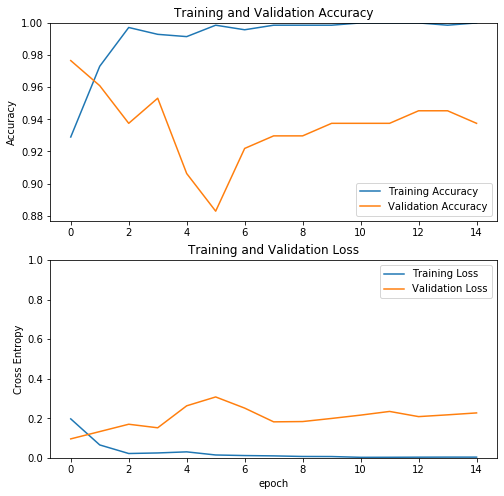

In [0]:
plot_history(history)

In [0]:
evalmod = load_model('model2.h5')

In [0]:
evalmod.evaluate(valid_ds, steps=len(valid_filepaths)//BATCH_SIZE)

4/4 [==============================] - 1s 244ms/step - loss: 0.0957 - accuracy: 0.9766


[0.09572930447757244, 0.9765625]

# Model Evaluation and Prediction

## Evaluation on test set

Choose finetuned model (model2.h5)

In [0]:
#evalmod = load_model('model2.h5')

In [0]:
evalmod.evaluate(test_ds, steps=len(test_filepaths)//BATCH_SIZE)

4/4 [==============================] - 4s 876ms/step - loss: 0.1371 - accuracy: 0.9766


[0.13707553036510944, 0.9765625]

## Predict Single Image

In [0]:
test_filepaths[-10:]

[PosixPath('data/chicken_rice/f699923c-67b9-423f-97ba-c0f021e3e80b.jpg'),
 PosixPath('data/roti_prata/2e26f1ec-7412-4b30-a136-d5db7cd9ad68.jpg'),
 PosixPath('data/mee_goreng/51a8333f-0379-4bd5-b8b2-18c5e3daa1e4.jpg'),
 PosixPath('data/roti_prata/fbea374f-3e5c-4a5c-bb07-370133bd9bbf.jpeg'),
 PosixPath('data/chicken_rice/496d09ba-ffc0-4631-9e36-b7e19e839922.jpg'),
 PosixPath('data/mee_goreng/f667edde-5a12-46d9-8a71-02837343543a.jpg'),
 PosixPath('data/chicken_rice/b9d7b023-2f22-4378-9c3f-27becba4fc74.jpeg'),
 PosixPath('data/mee_goreng/2a91a4b3-3378-45be-bd7b-6f19f16ce2d5.jpg'),
 PosixPath('data/roti_prata/a7ed5fdd-f9c4-4151-bfda-94700211b26f.jpeg'),
 PosixPath('data/mee_goreng/27ade406-d638-4f35-a6ce-e3a23ab069d1.jpg')]

In [0]:
CLASS_NAMES

array(['mee_goreng', 'roti_prata', 'chicken_rice'], dtype='<U12')

In [0]:
for x in test_filepaths[-10:]:
    img_bytes = tf.io.read_file(str(x))
    img = process_img_bytes(img_bytes, img_size=224, augments=valid_aug)
    label_arg = evalmod.predict(img, steps=1).argmax(axis=-1)[0]
    print(f'actual: {x.parts[-2]} predicted: {CLASS_NAMES[label_arg]} | {x.parts[-2] == CLASS_NAMES[label_arg]}')

actual: chicken_rice predicted: chicken_rice | True
actual: roti_prata predicted: roti_prata | True
actual: mee_goreng predicted: mee_goreng | True
actual: roti_prata predicted: roti_prata | True
actual: chicken_rice predicted: chicken_rice | True
actual: mee_goreng predicted: mee_goreng | True
actual: chicken_rice predicted: chicken_rice | True
actual: mee_goreng predicted: mee_goreng | True
actual: roti_prata predicted: roti_prata | True
actual: mee_goreng predicted: mee_goreng | True


In [0]:
??process_img_bytes

# Optional: Saving to Google Cloud Storage from Colab

You can save model to Cloud Storage Bucket using the dashboard interface. Alternatively, you can also upload it programatically. Please refer to sample code and modify accordingly. (Code snippets > Saving data with the Cloud Storage Python API)